In [37]:
# target을 파일명으로 지정해 준다.
target = 'Sepsidae'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, ward, average, single

%matplotlib inline

plt.style.use('ggplot')

In [39]:
data = pd.read_csv(target + ".csv", encoding = "ANSI")
data = data.drop(columns="num")

In [40]:
data = data.set_index(['species'])
data

,머리-뒷수직센털 유무-있음,머리-뒷수직센털 유무-없음,가슴-가슴 앞옆판 색-갈색,가슴-가슴 앞옆판 색-검은색,"가슴-sternopleuron, \nhypopleuron 가루-가루 덮임","가슴-sternopleuron, \nhypopleuron 가루-가루 덮이지 않음",가슴-작은방패판 색-방패판과 같은 색,가슴-작은방패판 색-방패판과 다른 색,가슴-한가운데센털 유무-있음,가슴-한가운데센털 유무-없음,...,"배-제4, 5배등판 가장자리센털-있음","배-제4, 5배등판 가장자리센털-없음",다리-넓적다리마디 무늬-없음,다리-넓적다리마디 무늬-있음,다리-osmetherium 유무-있음,다리-osmetherium 유무-없음,다리-osmetherium 모양-타원형,다리-osmetherium 모양-타원형 아니다,다리-osmetherium 모양-선형,다리-osmetherium 모양-선형 아니다
species,,,,,,,,,,,,,,,,,,,,,
Memi,1,0,0,1,0,1,1,0,0,1,...,1,0,0,1,1,0,1,0,0,1
Mefu,0,1,0,1,0,1,0,1,1,0,...,0,1,0,1,1,0,0,1,1,0
Sebi,1,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,1
Semo,1,0,0,1,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,1


In [41]:
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(data)
print('done.')

done.


In [42]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title(target + ' Hierarchical Clustering Dendrogram (WARD)')
        plt.xlabel('species')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    plt.savefig(target + ' WARD.png', dpi= 500)
    return ddata

In [43]:
# WARD 방법
linked_array = ward(temp_scaled)

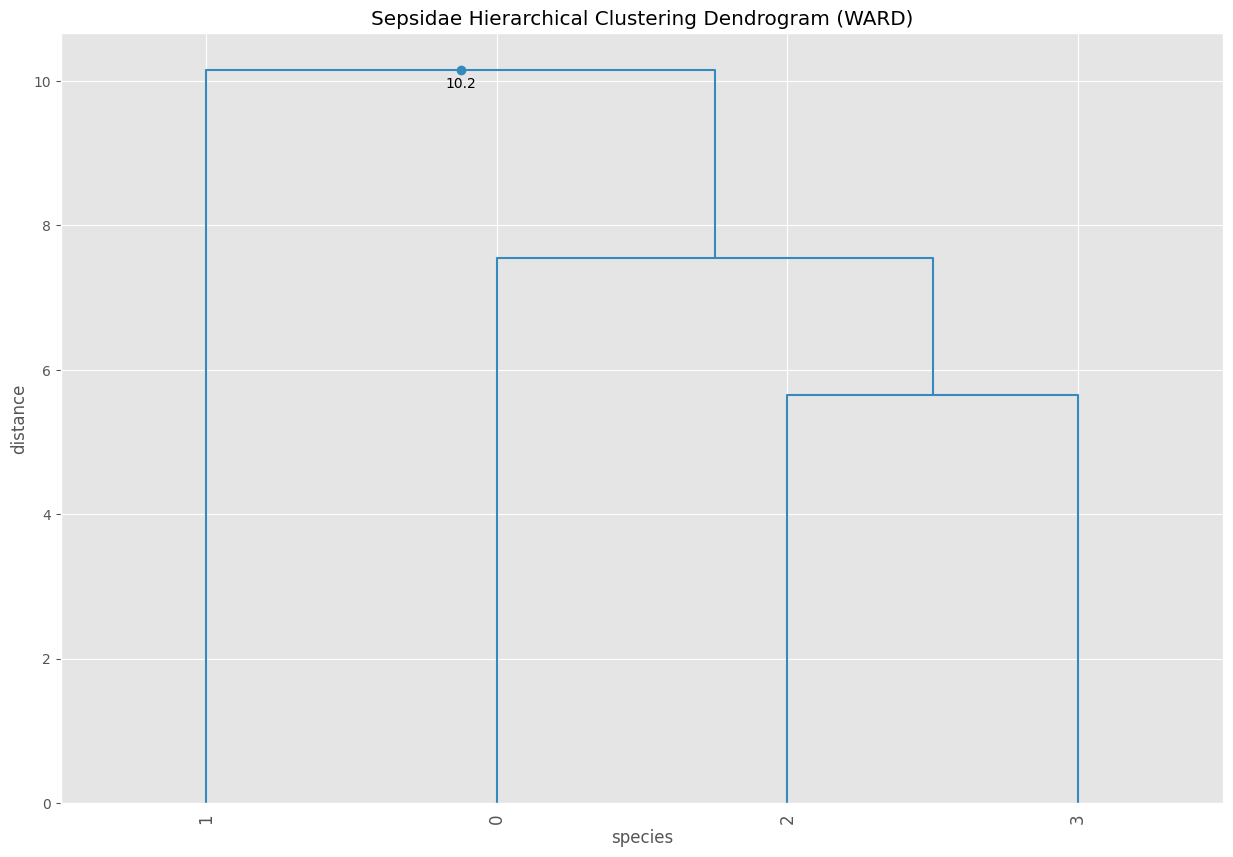

In [44]:
fancy_dendrogram(
    linked_array,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=80
)

plt.show()

In [45]:
data.index

Index(['Memi', 'Mefu', 'Sebi', 'Semo'], dtype='object', name='species')